### Matthew Connelly
### CSC 382
### Project 6
### Dijkstra's Shortest Path Algorithm

In [100]:
import networkx as nx
import matplotlib.pyplot as plt

In [101]:
# graph drawing options
def draw(graph):
    pos = nx.circular_layout(graph)
    nx.draw_networkx(graph,pos,font_color='white',font_size=15)
    labels = nx.get_edge_attributes(graph,'weight')
    nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels,font_size=20)

# Dijkstra's Shortest Path Algorithm
This function will return a list of tuples containing:
- The shortest distances from node 0 to all other nodes for a given graph
    - Can be modified to use source node other than 0
- The parent of that node, used to trace the shortest path

In [102]:
# dijkstra's shortest path algorithm
def dijkstra(graph):

    # a copy of our graph to delete from
    unvisited = list(graph.nodes)
    
    # a list of shortest distances
    # init: 0, infinity, infinity.....
    shortestDist = [float('inf') for i in graph.nodes]
    shortestDist[0] = 0
    
    # the parent of a vertex.
    # this will let us trace the shortest path to the source node,
    # by following each parent's parent
    parentVertex = [-1 for i in graph.nodes]
    
    currentNode = 0 # starting vertex

    while(len(unvisited)): # visit all nodes
        
        # find smallest unvisited node
        minDist = float('inf')
        for node in unvisited: # check shortest distances with only unvisited nodes
            if shortestDist[node] < minDist:
                currentNode = node
                minDist = shortestDist[node]
        
        # visit all neighbors of node
        # graph[currentNode] returns dictionary of currentNode neighbors with weights
        for neighbor in graph[currentNode]: 

            # calculate distance from starting node to neighbor
            # dist = ||current - neighbor|| + ||source - current||
            calculatedDist = graph[currentNode][neighbor]['weight'] + shortestDist[currentNode]
    
            # update shortest distance if shorter distance found
            # update parent node as well 
            if calculatedDist < shortestDist[neighbor]:
                shortestDist[neighbor] = calculatedDist
                parentVertex[neighbor] = currentNode

        unvisited.remove(currentNode) # remove from unvisited

    # return list of shortest distances and parent vertices
    return [(d,p) for d,p in zip(shortestDist,parentVertex)]

# Graph 1 (Provided)
This is the required graph to test for this algorithm.

vertex, shortest distance, parent:
0: (0, -1)
1: (2, 0)
2: (3, 1)
3: (7, 4)
4: (3, 1)
5: (4, 4)
6: (11, 7)
7: (5, 5)
8: (14, 6)
9: (12, 6)
10: (5, 5)


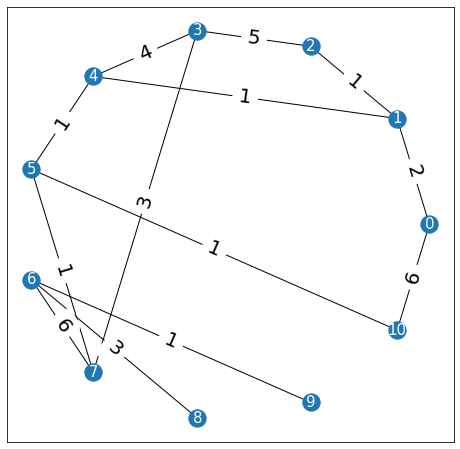

In [103]:
# plotting options
plt.figure(figsize=(8,8))

# construct graph
g = nx.Graph();

# add graph nodes
for i in range(11): g.add_node(i)
    
# add edges, added in consecutive order
g.add_edge(0,1,weight=2)
g.add_edge(0,10,weight=6)

g.add_edge(1,2,weight=1)
g.add_edge(1,4,weight=1)

g.add_edge(2,3,weight=5)

g.add_edge(3,4,weight=4)
g.add_edge(3,7,weight=3)

g.add_edge(4,5,weight=1)

g.add_edge(5,7,weight=1)
g.add_edge(5,10,weight=1)

g.add_edge(6,7,weight=6)
g.add_edge(6,8,weight=3)
g.add_edge(6,9,weight=1)

# display graph
draw(g)
    
# store and print table
results = dijkstra(g)
print('vertex, shortest distance, parent:')
for i in range(len(results)):
    print(f'{i}: {results[i]}')

# Graph 2 (Additional)
This is an additional graph for testing.

vertex, shortest distance, parent:
0: (0, -1)
1: (3, 3)
2: (7, 4)
3: (1, 0)
4: (2, 3)


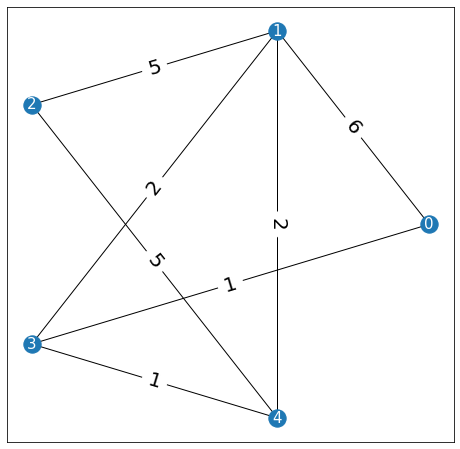

In [104]:
# plotting options
plt.figure(figsize=(8,8))

# construct graph
g = nx.Graph();

# add graph nodes
for i in range(5): g.add_node(i)
    
# add edges, added in consecutive order
g.add_edge(0,1,weight=6)
g.add_edge(0,3,weight=1)

g.add_edge(1,3,weight=2)
g.add_edge(1,4,weight=2)
g.add_edge(1,2,weight=5)

g.add_edge(2,1,weight=5)
g.add_edge(2,4,weight=5)

g.add_edge(3,4,weight=1)

# display graph
draw(g)
    
# store and print table
results = dijkstra(g)
print('vertex, shortest distance, parent:')
for i in range(len(results)):
    print(f'{i}: {results[i]}')